<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Soltani

**Student ID**: 400101356



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [2]:
## Import necessary libraries here ##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [5]:
## Write your code here ##

# Load the dataset
df = pd.read_csv('Q1/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


The Boston Housing Dataset is a popular dataset used in machine learning and regression analysis⁴. It contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts². The dataset has **506 samples**¹³.

The dataset consists of **13 input features** and a **target variable (MEDV)**³. Here are the features:

1. **CRIM**: Per capita crime rate by town
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS**: Proportion of non-retail business acres per town
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. **NOX**: Nitric oxides concentration (parts per 10 million)
6. **RM**: Average number of rooms per dwelling
7. **AGE**: Proportion of owner-occupied units built prior to 1940
8. **DIS**: Weighted distances to five Boston employment centres
9. **RAD**: Index of accessibility to radial highways
10. **TAX**: Full-value property-tax rate per $10,000
11. **PTRATIO**: Pupil-teacher ratio by town
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. **LSTAT**: % lower status of the population

The target variable, **MEDV**, represents the median value of owner-occupied homes in $1000's².

So, the shape of the dataset is **(506, 14)**, including the target variable. Please note that the actual shape of your provided **boston.csv** file might be different. You can check it using pandas' `shape` attribute after loading the csv file. 

Source: Conversation with Bing, 5/3/2024
(1) GitHub - margaret-rozario/Boston-Housing: The Boston Housing dataset is .... https://github.com/margaret-rozario/Boston-Housing.
(2) Boston Dataset - Department of Computer Science, University of Toronto. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.
(3) Boston Housing Dataset Example - Google Colab. https://colab.research.google.com/github/ds4m/ds4m.github.io/blob/master/chapter-8-resources/boston-dataset-example.ipynb.
(4) Boston Housing Analysis - GitHub. https://github.com/sminerport/boston-housing-analysis.
(5) undefined. http://lib.stat.cmu.edu/datasets/boston.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [5]:
## Write your code here ##

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print R^2 and RMSE for the training set
print("Training set:")
print("R^2: ", r2_score(y_train, y_train_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Calculate and print R^2 and RMSE for the testing set
print("\nTesting set:")
print("R^2: ", r2_score(y_test, y_test_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Print the coefficients of the model
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Training set:
R^2:  0.7508856358979672
RMSE:  4.6520331848801675

Testing set:
R^2:  0.6687594935356316
RMSE:  4.9286021826653394

Coefficients:
CRIM: -0.11305592398537878
ZN: 0.030110464145645294
INDUS: 0.040380720413337526
CHAS: 2.784438203507853
NX: -17.202633391781273
RM: 4.438835199513052
AGE: -0.006296362210983559
DIS: -1.4478653685307885
RAD: 0.26242973558508553
TAX: -0.010646786275308497
PTRATIO: -0.9154562404680762
B: 0.012351334729968397
LSTAT: -0.5085714244487939


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

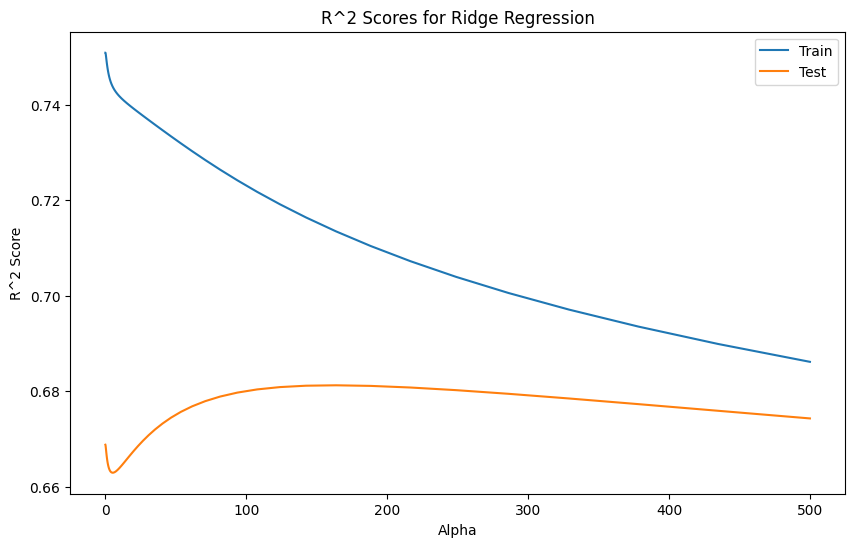

Best alpha: 163.72745814388642
         Coefficient
CRIM       -0.110589
ZN          0.039961
INDUS      -0.052001
CHAS        0.380734
NX         -0.115418
RM          1.897203
AGE         0.007098
DIS        -1.052416
RAD         0.309451
TAX        -0.014947
PTRATIO    -0.822722
B           0.011598
LSTAT      -0.725895


In [10]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Define the alphas
alphas = 10**np.linspace(3,-3,100)*0.5

# Initialize lists to store scores
ridge_scores_train = []
ridge_scores_test = []
ridge_coefs = []

# Iterate over alphas
for alpha in alphas:
    # Train a Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Make predictions
    y_train_pred_ridge = ridge.predict(X_train)
    y_test_pred_ridge = ridge.predict(X_test)

    # Calculate R^2 for train and test set
    r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
    r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

    # Append scores to lists
    ridge_scores_train.append(r2_train_ridge)
    ridge_scores_test.append(r2_test_ridge)
    ridge_coefs.append(ridge.coef_)

# Plot R^2 scores
plt.figure(figsize=(10,6))
plt.plot(alphas, ridge_scores_train, label='Train')
plt.plot(alphas, ridge_scores_test, label='Test')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('R^2 Scores for Ridge Regression')
plt.legend()
plt.show()

# Print the coefficients for the best alpha
best_alpha_index = np.argmax(ridge_scores_test)
best_alpha = alphas[best_alpha_index]
best_coefs = ridge_coefs[best_alpha_index]
coefficients_ridge = pd.DataFrame(best_coefs, X.columns, columns=['Coefficient'])
print(f'Best alpha: {best_alpha}')
print(coefficients_ridge)


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

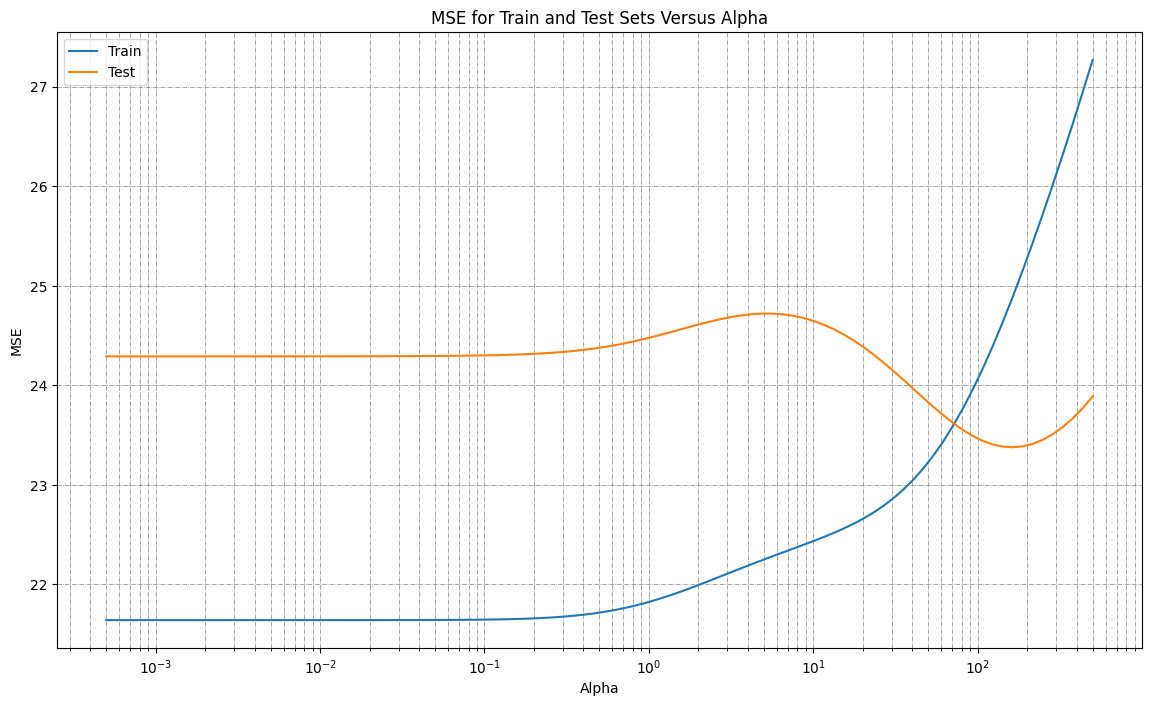

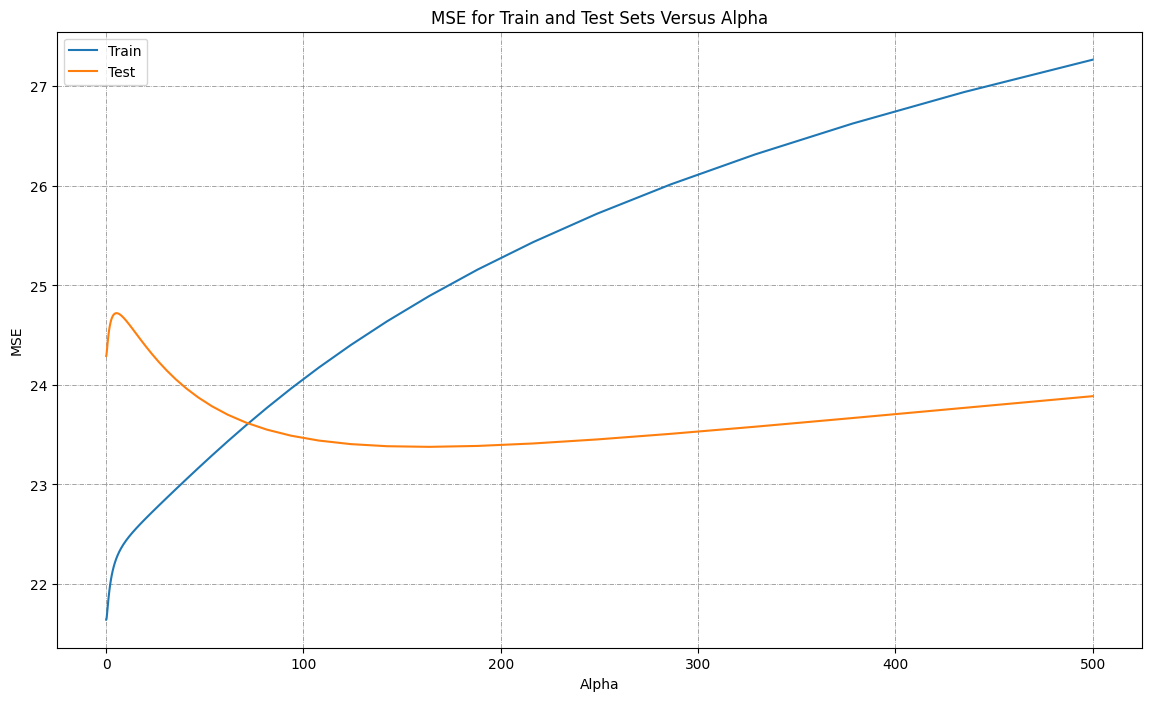

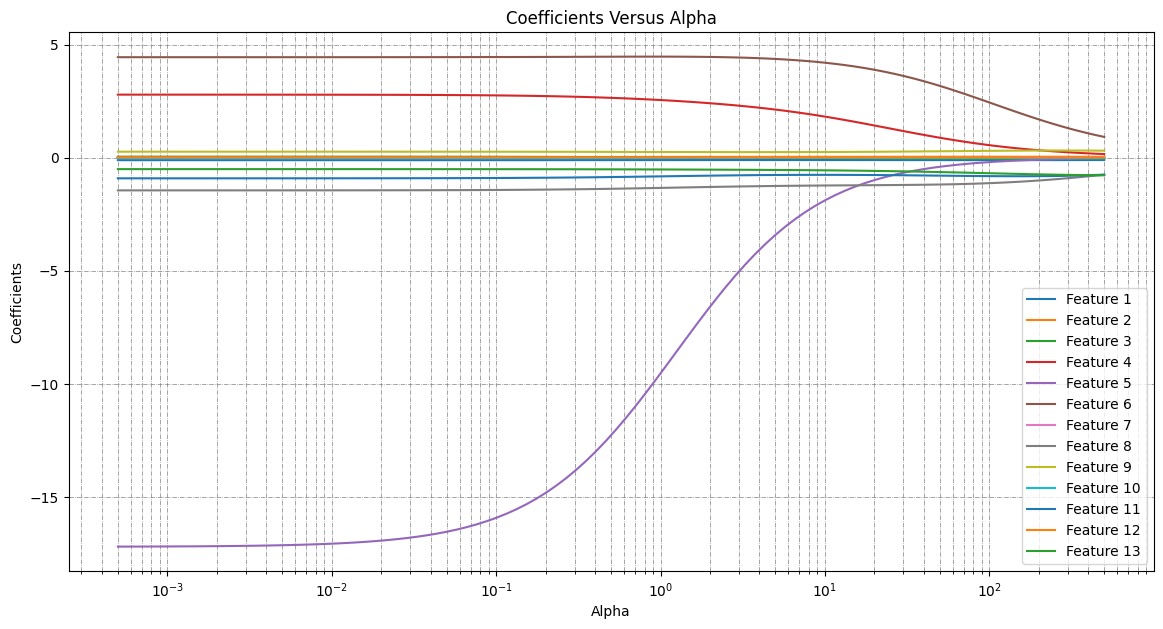

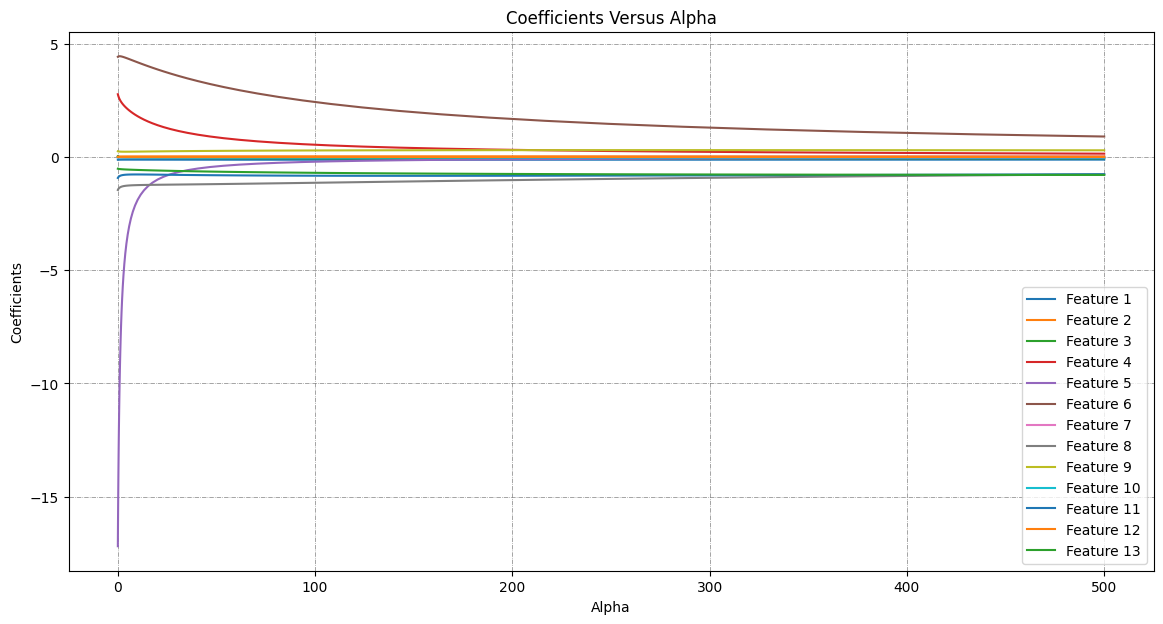

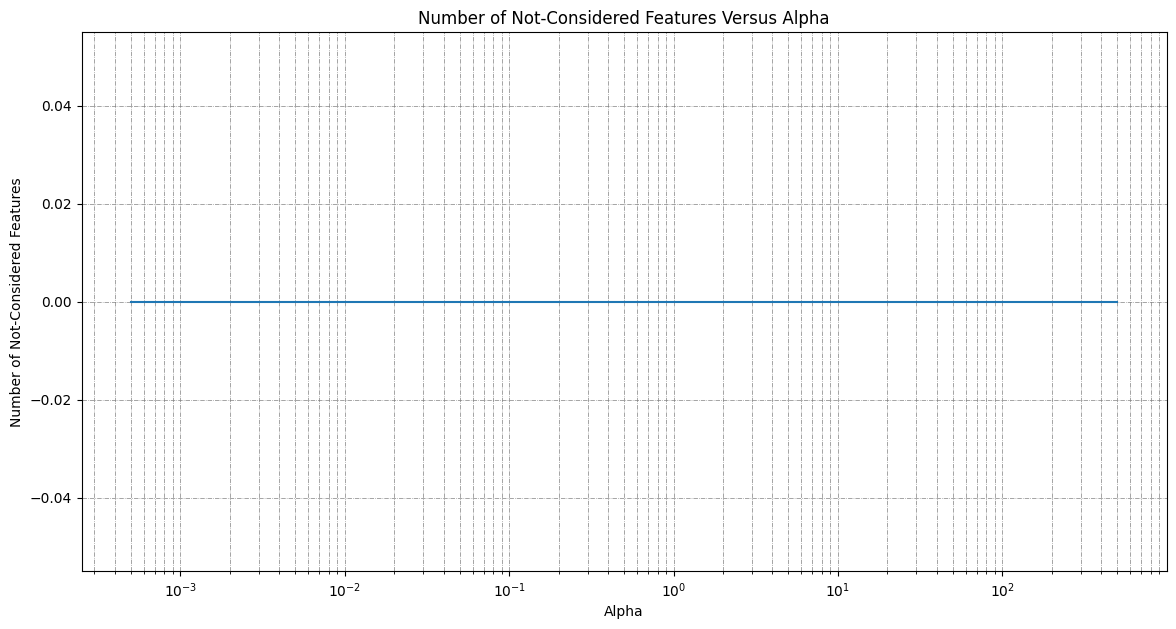

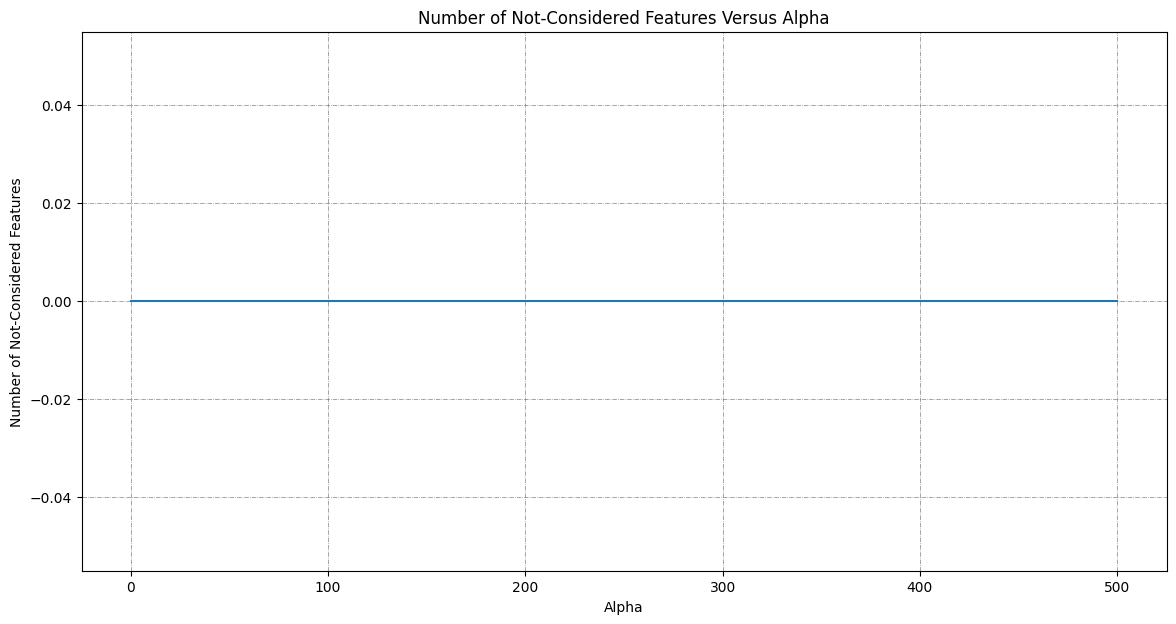

Optimal Alpha: 163.72745814388642

Training set with optimal alpha:
MSE:  24.893440476055062
R^2:  0.7134515354789042

Testing set with optimal alpha:
MSE:  23.378168171507383
R^2:  0.6812087531281752

Coefficients with optimal alpha:
CRIM: -0.11058924017476489
ZN: 0.03996101938063583
INDUS: -0.05200140424026486
CHAS: 0.3807340413242887
NX: -0.11541799895382028
RM: 1.8972033058491349
AGE: 0.007097764390634357
DIS: -1.052415691983124
RAD: 0.30945089881321364
TAX: -0.014947408542740511
PTRATIO: -0.8227218767661523
B: 0.011598413637365865
LSTAT: -0.7258953858297859


In [50]:
## Write your code here ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the alphas parameter
alphas = 10**(np.linspace(3,-3,100))*0.5

# Initialize lists to store metrics and coefficients
train_errors = []
test_errors = []
coefficients = []
zero_coefs = []
coefficientslabel = []

# Train a Ridge Regression model for each alpha
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store MSE for the training and testing sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients and count of zero coefficients
    coefficients.append(model.coef_)
    zero_coefs.append(np.sum(model.coef_ == 0))

# Plot MSE for train and test versus alpha in log scale
plt.figure(figsize=(14, 8))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test Sets Versus Alpha')
plt.legend()
plt.xscale('log')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot MSE for train and test versus alpha
plt.figure(figsize=(14, 8))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test Sets Versus Alpha')
plt.legend()
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot coefficients versus alpha in log scale
plt.figure(figsize=(14, 7))
# Transpose the list of lists
coefficients_transposed = list(map(list, zip(*coefficients)))
# Use list comprehension to plot each feature and collect line objects
lines = [plt.plot(alphas, coef)[0] for coef in coefficients_transposed]
# Set labels for each line using a loop
for i, line in enumerate(lines, start=1):
    line.set_label(f'Feature {i}')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients Versus Alpha')
plt.legend()
plt.xscale('log')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot coefficients versus alpha
plt.figure(figsize=(14, 7))
# Transpose the list of lists
coefficients_transposed = list(map(list, zip(*coefficients)))
# Use list comprehension to plot each feature and collect line objects
lines = [plt.plot(alphas, coef)[0] for coef in coefficients_transposed]
# Set labels for each line using a loop
for i, line in enumerate(lines, start=1):
    line.set_label(f'Feature {i}')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients Versus Alpha')
plt.legend()
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot number of not-considered features versus alpha in log scale
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features Versus Alpha')
plt.xscale('log')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot number of not-considered features versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features Versus Alpha')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Find the optimal alpha (the one that gives the smallest test error)
optimal_alpha = alphas[np.argmin(test_errors)]
print(f"Optimal Alpha: {optimal_alpha}")

# Train a Ridge Regression model with the optimal alpha 
model = Ridge(alpha=optimal_alpha)
model.fit(X_train, y_train)

# Make predictions with the optimal model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print MSE and R^2 for the training set
print("\nTraining set with optimal alpha:")
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R^2: ", r2_score(y_train, y_train_pred))

# Calculate and print MSE and R^2 for the testing set
print("\nTesting set with optimal alpha:")
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R^2: ", r2_score(y_test, y_test_pred))

# Print the coefficients of the model with the optimal alpha
print("\nCoefficients with optimal alpha:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

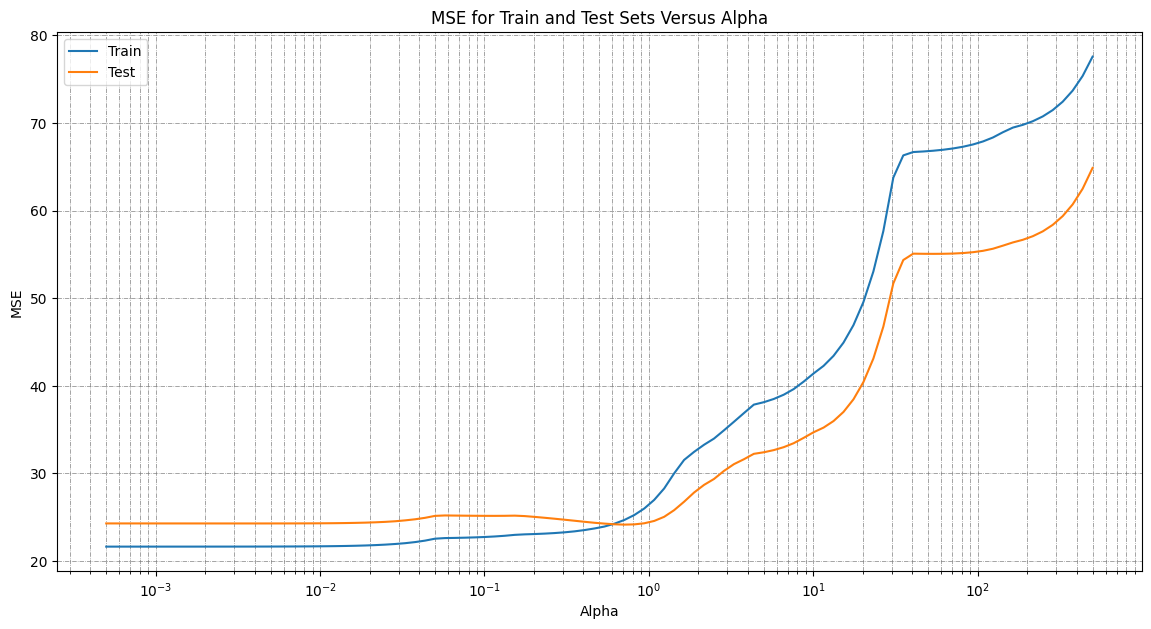

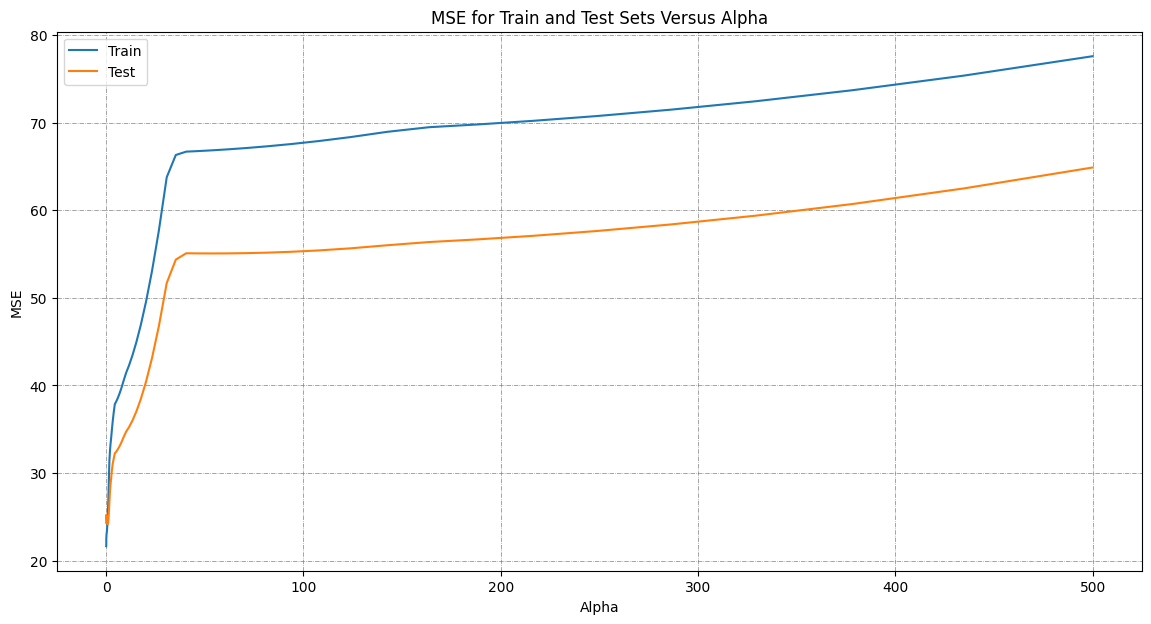

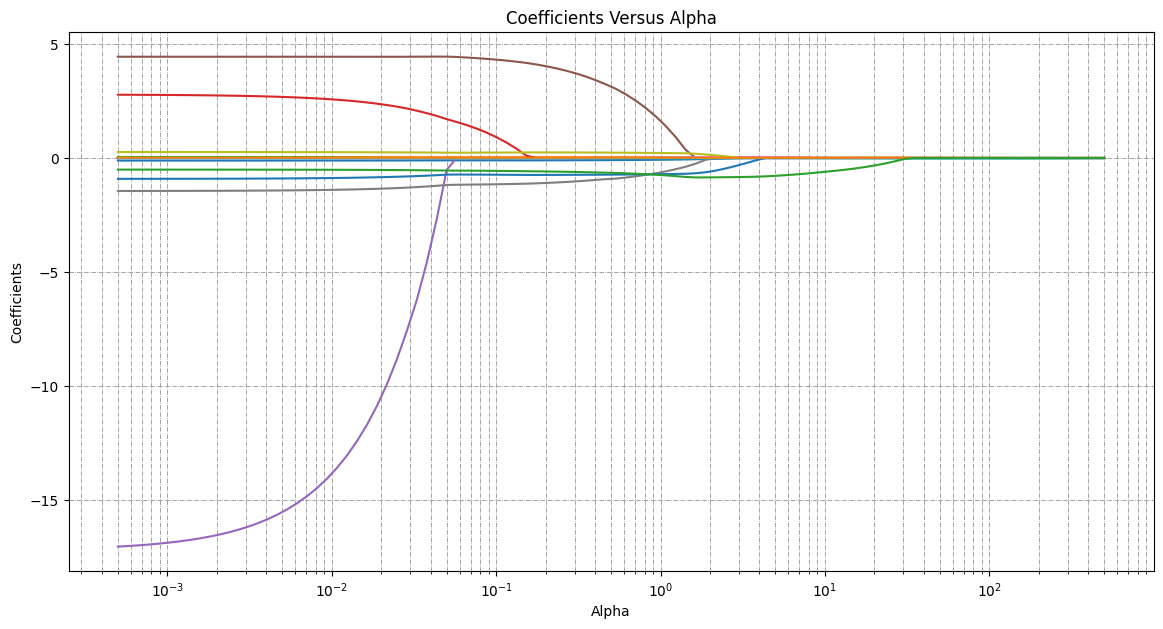

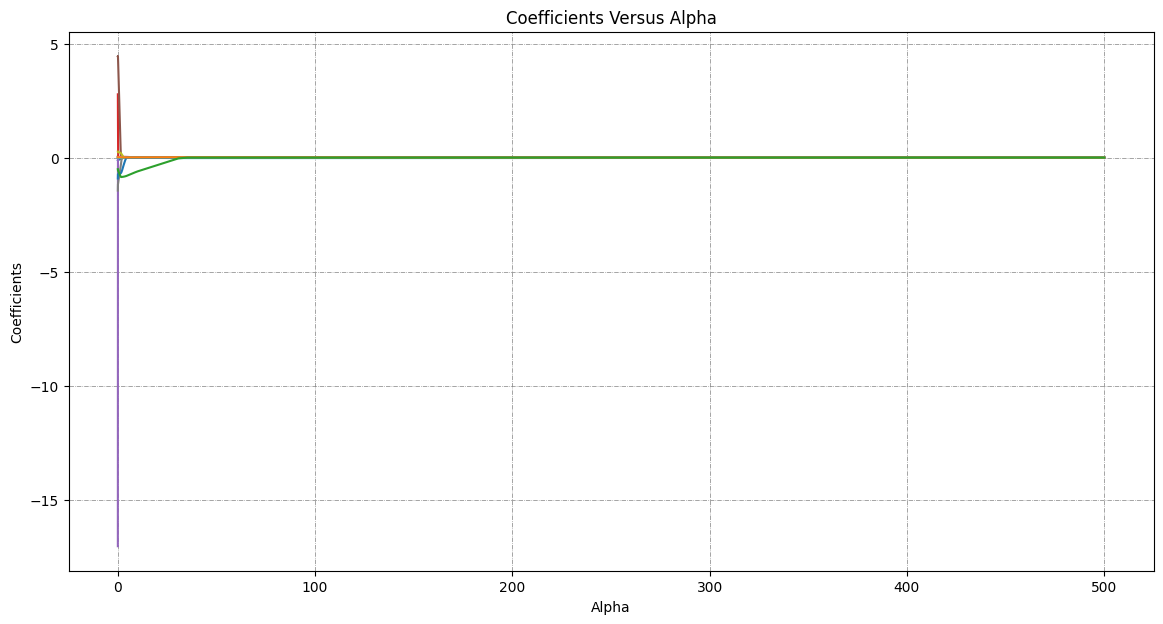

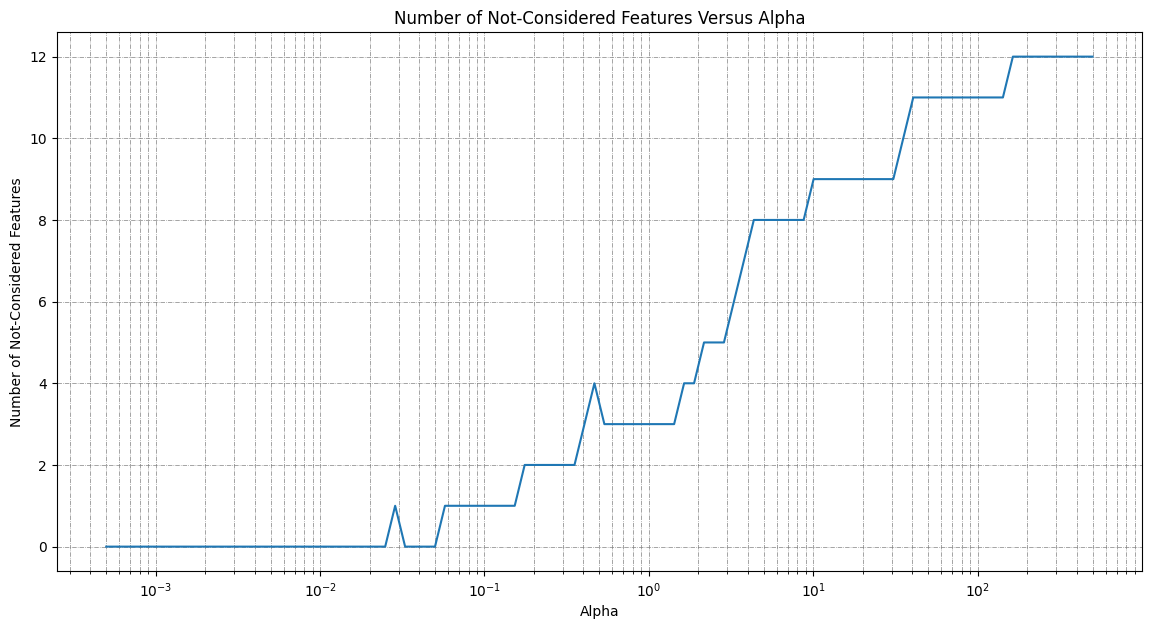

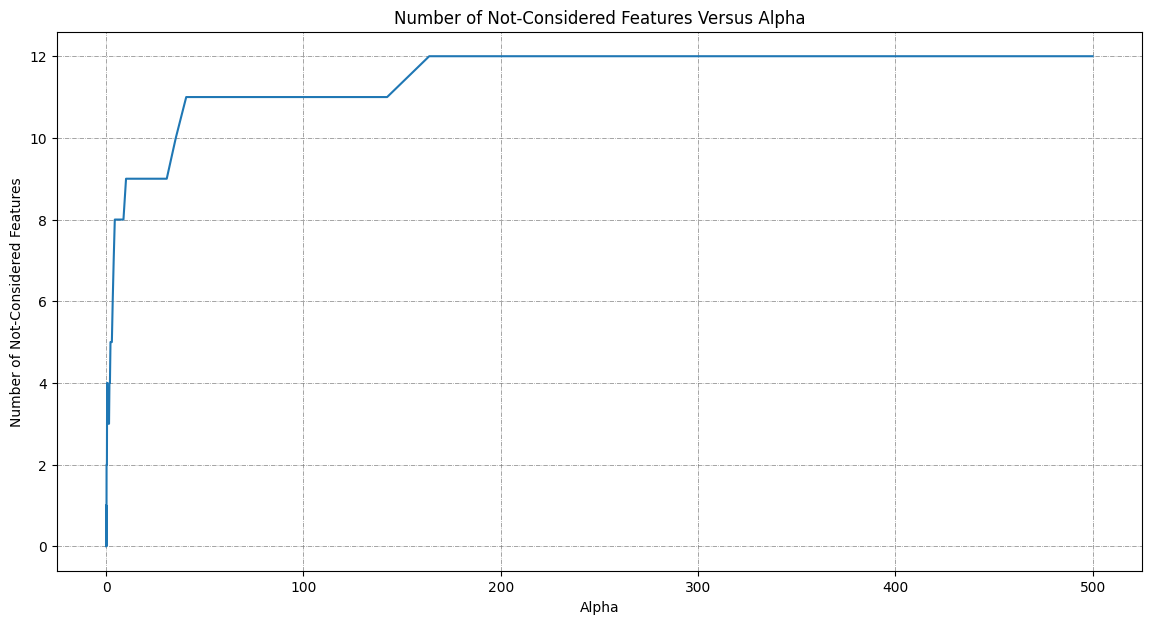

Optimal Alpha: 0.7087370814634024

Training set with optimal alpha:
MSE:  24.68208868686117
R^2:  0.715884406528832

Testing set with optimal alpha:
MSE:  24.153219243073362
R^2:  0.6706399397086963

Coefficients with optimal alpha:
CRIM: -0.08616746198497376
ZN: 0.03080669858772505
INDUS: -0.0
CHAS: 0.0
NX: -0.0
RM: 2.508243729868582
AGE: 0.006114129499851363
DIS: -0.8015580004755933
RAD: 0.22931101994767975
TAX: -0.01270716686172116
PTRATIO: -0.7205718672396781
B: 0.01186642174039264
LSTAT: -0.6895356401458913


In [51]:
## Write your code here ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Q1/boston.csv')

# Split the dataset into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the alphas parameter
alphas = 10**(np.linspace(3,-3,100))*0.5

# Initialize lists to store metrics and coefficients
train_errors = []
test_errors = []
coefficients = []
zero_coefs = []

# Train a Lasso Regression model for each alpha
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store MSE for the training and testing sets
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Store coefficients and count of zero coefficients
    coefficients.append(model.coef_)
    zero_coefs.append(np.sum(model.coef_ == 0))

# Plot MSE for train and test versus alpha  in log scale
plt.figure(figsize=(14, 7))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test Sets Versus Alpha')
plt.legend()
plt.xscale('log')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot MSE for train and test versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, train_errors, label='Train')
plt.plot(alphas, test_errors, label='Test')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test Sets Versus Alpha')
plt.legend()
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot coefficients versus alpha  in log scale
plt.figure(figsize=(14, 7))
plt.plot(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients Versus Alpha')
plt.xscale('log')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot coefficients versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, coefficients)
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Coefficients Versus Alpha')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot number of not-considered features versus alpha  in log scale
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features Versus Alpha')
plt.xscale('log')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Plot number of not-considered features versus alpha
plt.figure(figsize=(14, 7))
plt.plot(alphas, zero_coefs)
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features Versus Alpha')
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()

# Find the optimal alpha (the one that gives the smallest test error)
optimal_alpha = alphas[np.argmin(test_errors)]
print(f"Optimal Alpha: {optimal_alpha}")

# Train a Lasso Regression model with the optimal alpha
model = Lasso(alpha=optimal_alpha)
model.fit(X_train, y_train)

# Make predictions with the optimal model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate and print MSE and R^2 for the training set
print("\nTraining set with optimal alpha:")
print("MSE: ", mean_squared_error(y_train, y_train_pred))
print("R^2: ", r2_score(y_train, y_train_pred))

# Calculate and print MSE and R^2 for the testing set
print("\nTesting set with optimal alpha:")
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("R^2: ", r2_score(y_test, y_test_pred))

# Print the coefficients of the model with the optimal alpha
print("\nCoefficients with optimal alpha:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

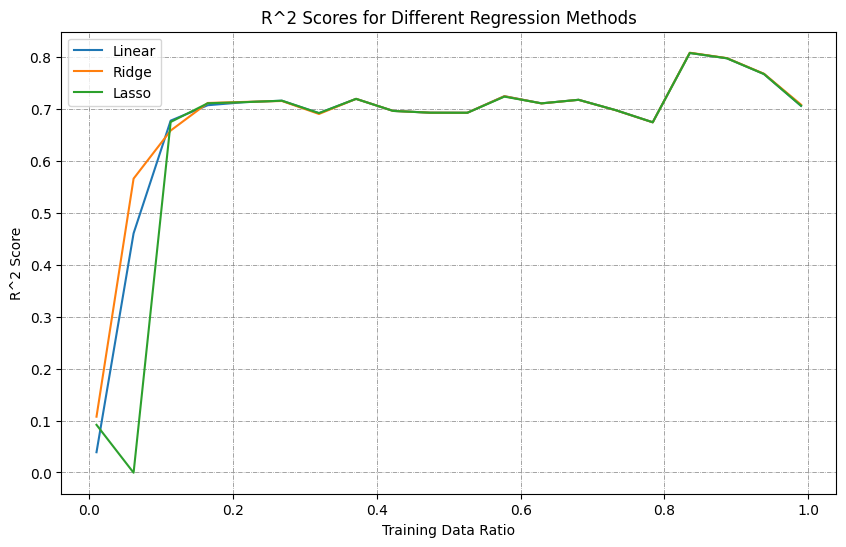

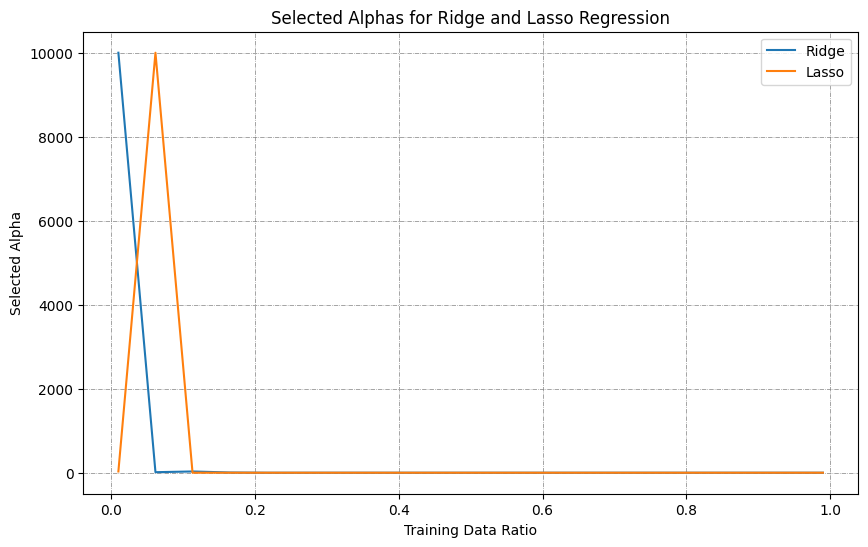

In [67]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

# Generate a sequence of alpha values for testing
alpha_sequence = np.logspace(-4, 4, 150)

# Define the ratios
ratios = np.linspace(0.01, 0.99, 20)

# Initialize lists to store scores and alphas
r2_scores = {'Linear': [], 'Ridge': [], 'Lasso': []}
alphas_selected = {'Ridge': [], 'Lasso': []}

# Iterate over ratios
for ratio in ratios:
    # Split the dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Train a Linear regression model
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    # Train a Ridge regression model with cross-validation to select the best alpha
    ridge = RidgeCV(alphas=alpha_sequence)
    ridge.fit(X_train, y_train)

    # Train a Lasso regression model with cross-validation to select the best alpha
    lasso = LassoCV(alphas=alpha_sequence)
    lasso.fit(X_train, y_train)

    # Make predictions
    y_test_pred_linear = linear.predict(X_test)
    y_test_pred_ridge = ridge.predict(X_test)
    y_test_pred_lasso = lasso.predict(X_test)

    # Calculate R^2 for test set
    r2_test_linear = r2_score(y_test, y_test_pred_linear)
    r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
    r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

    # Append scores and selected alphas to lists
    r2_scores['Linear'].append(r2_test_linear)
    r2_scores['Ridge'].append(r2_test_ridge)
    r2_scores['Lasso'].append(r2_test_lasso)
    alphas_selected['Ridge'].append(ridge.alpha_)
    alphas_selected['Lasso'].append(lasso.alpha_)


# Plot R^2 scores
plt.figure(figsize=(10,6))
for method, scores in r2_scores.items():
    plt.plot(ratios, scores, label=method)
plt.xlabel('Training Data Ratio')
plt.ylabel('R^2 Score')
plt.title('R^2 Scores for Different Regression Methods')
plt.legend()
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()


# Plot selected alphas  in log scale
plt.figure(figsize=(10,6))
for method, alphas in alphas_selected.items():
    plt.plot(ratios, alphas, label=method)
plt.xlabel('Training Data Ratio')
plt.ylabel('Selected Alpha')
plt.title('Selected Alphas for Ridge and Lasso Regression')
plt.legend()
plt.grid(True, which='both', axis='both', color='gray', linestyle='-.', linewidth=0.5)
plt.show()
